In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("news.csv")
df.head()

,text,subject,fake
0,Donald Trump just couldn t wish all Americans ...,News,1
1,House Intelligence Committee Chairman Devin Nu...,News,1
2,"On Friday, it was revealed that former Milwauk...",News,1
3,"On Christmas day, Donald Trump announced that ...",News,1
4,Pope Francis used his annual Christmas Day mes...,News,1


In [3]:
df.shape

(408, 3)

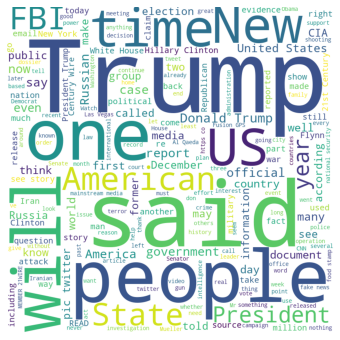

In [4]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["fake"]==1]["text"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

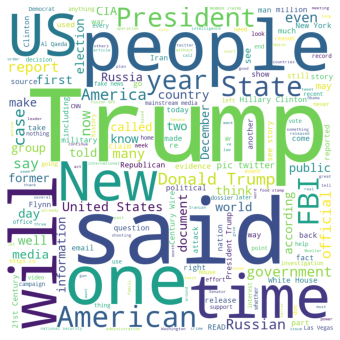

In [5]:
wc = WordCloud(width = 800, 
               height = 800, 
               background_color ='white',  
               min_font_size = 10)

wc.generate(''.join(df[df["fake"]==0]["text"]))

plt.figure(figsize = (6,6)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [6]:
X = df["text"]
y = df["fake"]

In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: fake, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
cv = CountVectorizer(stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [11]:
sdf = SVC()
sdf.fit(X_train_cv,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred = sdf.predict(X_test_cv)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.10      0.13        68
           1       0.24      0.35      0.28        55

    accuracy                           0.21       123
   macro avg       0.20      0.22      0.20       123
weighted avg       0.20      0.21      0.20       123



In [13]:
# tfidf

tf = TfidfVectorizer(stop_words="english")
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [14]:
sdf = SVC()
sdf.fit(X_train_tf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred = sdf.predict(X_test_tf)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.03      0.01      0.02        68
           1       0.22      0.35      0.27        55

    accuracy                           0.16       123
   macro avg       0.12      0.18      0.14       123
weighted avg       0.11      0.16      0.13       123

